In [58]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv(r'C:\Users\Gaurav\Desktop\major data.csv')
df.head()

,Parent_age,Parent_Gender,Child_Age,Child_Gender,Number_of_Children,Family_members,Parental_Attachment,Parenting_Approach,Comfort_Expressing_Emotions,Response_to_Needs,Relationship_with_child,Behavioral_Problems,Interaction_with_Others,Academic_Performance,Education_Level,Both_parents_working_full_time,Employment_Status,Bonding_activities_with_child,Affected_Relationship_with_child
0,40,Male,20,Male,2,4,Secure,Warm and responsive,Yes,Prompt and supportive,Excellent,No,Very well,Above average,Bachelor's degree,No,Employed full-time,Several times a week,No
1,58,Male,24,Male,3,5,Secure,Warm and responsive,Sometimes,Prompt and supportive,Excellent,Sometimes,Very well,Above average,Master's degree or higher,Yes,Employed full-time,Daily,Yes
2,45,Male,21,Male,2,4,Secure,Warm and responsive,Yes,Prompt and supportive,Excellent,Yes,Very well,Above average,High school or equivalent,Yes,Employed full-time,Daily,Yes
3,45,Male,18,Male,3,5,Secure,cool and Descent,Yes,Prompt and supportive,Excellent,Sometimes,Very well,Above average,High school or equivalent,No,Employed part-time,Several times a week,No
4,37,Female,17,Male,2,4,Secure,Warm and responsive,Sometimes,Prompt and supportive,Excellent,No,Very well,Above average,High school or equivalent,No,Homemaker,Daily,No


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif_data = X.assign(const=1)  # Add a constant column for intercept
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

# Print VIF values
print("VIF values:")
print(vif_series)

VIF values:
Parental_Attachment                  1.120455
Parenting_Approach                   1.055567
Comfort_Expressing_Emotions          1.141894
Response_to_Needs                    1.060629
Relationship_with_child              1.219101
Interaction_with_Others              1.176285
Academic_Performance                 1.208315
Education_Level                      1.065769
Both_parents_working_full_time       1.230653
Employment_Status                    1.227182
Bonding_activities_with_child        1.141155
Affected_Relationship_with_child     1.132087
const                               44.607694
dtype: float64


In [60]:
data=df.iloc[:, 6:]
data.head()

,Parental_Attachment,Parenting_Approach,Comfort_Expressing_Emotions,Response_to_Needs,Relationship_with_child,Behavioral_Problems,Interaction_with_Others,Academic_Performance,Education_Level,Both_parents_working_full_time,Employment_Status,Bonding_activities_with_child,Affected_Relationship_with_child
0,Secure,Warm and responsive,Yes,Prompt and supportive,Excellent,No,Very well,Above average,Bachelor's degree,No,Employed full-time,Several times a week,No
1,Secure,Warm and responsive,Sometimes,Prompt and supportive,Excellent,Sometimes,Very well,Above average,Master's degree or higher,Yes,Employed full-time,Daily,Yes
2,Secure,Warm and responsive,Yes,Prompt and supportive,Excellent,Yes,Very well,Above average,High school or equivalent,Yes,Employed full-time,Daily,Yes
3,Secure,cool and Descent,Yes,Prompt and supportive,Excellent,Sometimes,Very well,Above average,High school or equivalent,No,Employed part-time,Several times a week,No
4,Secure,Warm and responsive,Sometimes,Prompt and supportive,Excellent,No,Very well,Above average,High school or equivalent,No,Homemaker,Daily,No


# RandomForestClassifier

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert categorical variables into numerical format
label_encoder = LabelEncoder()
cat_cols = ['Parental_Attachment', 'Comfort_Expressing_Emotions','Parenting_Approach', 'Response_to_Needs', 
            'Relationship_with_child', 'Behavioral_Problems', 'Interaction_with_Others', 
            'Academic_Performance', 'Education_Level', 'Both_parents_working_full_time', 
            'Employment_Status', 'Bonding_activities_with_child', 'Affected_Relationship_with_child']

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Select features and target variable
X = data.drop(columns=['Behavioral_Problems'])  # Features
y = data['Behavioral_Problems']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        49
           1       0.94      0.70      0.80        23
           2       0.80      0.67      0.73         6

    accuracy                           0.87        78
   macro avg       0.87      0.78      0.81        78
weighted avg       0.88      0.87      0.87        78

[[48  1  0]
 [ 6 16  1]
 [ 2  0  4]]
                             Feature  Importance
10     Bonding_activities_with_child    0.128530
1                 Parenting_Approach    0.102427
9                  Employment_Status    0.096730
7                    Education_Level    0.096175
11  Affected_Relationship_with_child    0.089280
6               Academic_Performance    0.083992
4            Relationship_with_child    0.081854
2        Comfort_Expressing_Emotions    0.076612
5            Interaction_with_Others    0.074429
0                Parental_Attachment    0.066062
8     Both_parents_working_f

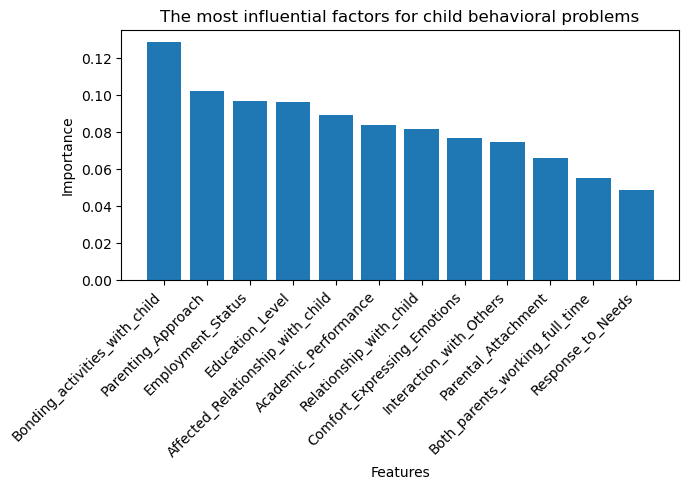

In [5]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(7, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('The most influential factors for child behavioral problems')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# DecisionTreeClassifier

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
label_encoder = LabelEncoder()
cat_cols = ['Parental_Attachment', 'Comfort_Expressing_Emotions','Parenting_Approach', 'Response_to_Needs', 
            'Relationship_with_child', 'Behavioral_Problems', 'Interaction_with_Others', 
            'Academic_Performance', 'Education_Level', 'Both_parents_working_full_time', 
            'Employment_Status', 'Bonding_activities_with_child', 'Affected_Relationship_with_child']

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])


# Select features and target variable
X = data.drop(columns=['Behavioral_Problems'])  # Features
y = data['Behavioral_Problems']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        49
           1       0.93      0.61      0.74        23
           2       0.71      0.83      0.77         6

    accuracy                           0.85        78
   macro avg       0.83      0.80      0.80        78
weighted avg       0.86      0.85      0.84        78

[[47  1  1]
 [ 8 14  1]
 [ 1  0  5]]


# Multinomial LogisticRegression

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

label_encoder = LabelEncoder()
cat_cols = ['Parental_Attachment', 'Comfort_Expressing_Emotions','Parenting_Approach', 'Response_to_Needs', 
            'Relationship_with_child', 'Behavioral_Problems', 'Interaction_with_Others', 
            'Academic_Performance', 'Education_Level', 'Both_parents_working_full_time', 
            'Employment_Status', 'Bonding_activities_with_child', 'Affected_Relationship_with_child']

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Select features and target variable
X = data.drop(columns=['Behavioral_Problems'])  # Features
y = data['Behavioral_Problems']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Multinomial Logistic Regression model
logreg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the classifier
logreg_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.70      0.80      0.74        49
           1       0.39      0.30      0.34        23
           2       0.25      0.17      0.20         6

    accuracy                           0.60        78
   macro avg       0.45      0.42      0.43        78
weighted avg       0.57      0.60      0.58        78

[[39  9  1]
 [14  7  2]
 [ 3  2  1]]


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Fit a multinomial logistic regression model using statsmodels
model = sm.MNLogit(y, X)
result = model.fit()

# Perform the likelihood ratio test
lr_test = result.summary()

# Print the ANOVA-like table
print(lr_test)

Optimization terminated successfully.
         Current function value: 0.915435
         Iterations 6
                           MNLogit Regression Results                          
Dep. Variable:     Behavioral_Problems   No. Observations:                  390
Model:                         MNLogit   Df Residuals:                      366
Method:                            MLE   Df Model:                           22
Date:                 Fri, 19 Apr 2024   Pseudo R-squ.:                 0.07868
Time:                         10:37:12   Log-Likelihood:                -357.02
converged:                        True   LL-Null:                       -387.51
Covariance Type:             nonrobust   LLR p-value:                 1.601e-05
           Behavioral_Problems=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Parental_Attachment                 -0.1391      0.158  

# Chi-Square Test

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'data' with columns: 'Parent_Gender', 'Child_Gender', 'Parenting_Style'

# Create a contingency table
contingency_table = pd.crosstab(index=df['Parent_Gender'],columns=[df['Child_Gender'], df['Parenting_Approach']], margins=True)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index))

Chi-Square Statistic: 93.46550765254243
P-value: 5.725283199659808e-13
Degrees of Freedom: 16

Expected Frequencies:
Child_Gender             Female                                 \
Parenting_Approach Inconsistent Possessive Warm and responsive   
Parent_Gender                                                    
Female                 3.302564   9.907692           28.071795   
Male                   4.697436  14.092308           39.928205   
All                    8.000000  24.000000           68.000000   

Child_Gender                                Male             \
Parenting_Approach cool and Descent Inconsistent Possessive   
Parent_Gender                                                 
Female                    29.723077     4.128205  13.210256   
Male                      42.276923     5.871795  18.789744   
All                       72.000000    10.000000  32.000000   

Child_Gender                                               All  
Parenting_Approach Warm and responsive coo

# Heatmap

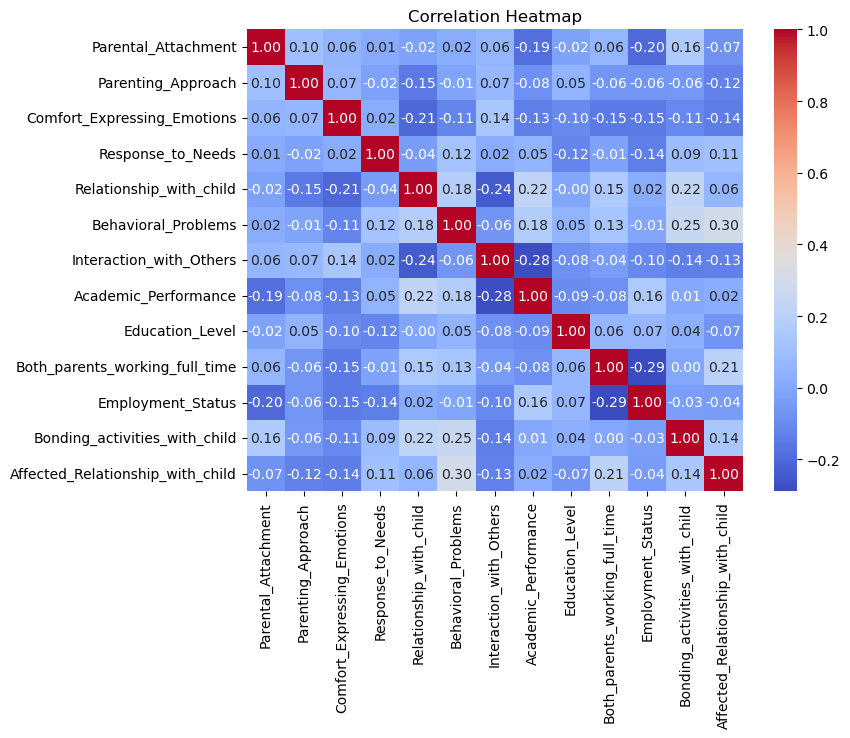

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded into a DataFrame called 'df'
# Perform any necessary data preprocessing here

# Calculate correlation matrix
corr_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Multilayer Perceptron (MLP) classifier:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Behavioral_Problems'])  # Features
y = data['Behavioral_Problems']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_mlp = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Model Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

Model Accuracy: 0.8846153846153846
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.82      0.78      0.80        23
           2       1.00      0.83      0.91         6

    accuracy                           0.88        78
   macro avg       0.91      0.85      0.88        78
weighted avg       0.88      0.88      0.88        78

Confusion Matrix:
[[46  3  0]
 [ 5 18  0]
 [ 0  1  5]]


D:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                                  Importance
Bonding_activities_with_child      19.397000
Parenting_Approach                 18.023591
Comfort_Expressing_Emotions        17.781512
Employment_Status                  17.557922
Response_to_Needs                  17.557625
Academic_Performance               17.152136
Relationship_with_child            16.934402
Affected_Relationship_with_child   16.538187
Interaction_with_Others            16.007734
Both_parents_working_full_time     15.955767
Education_Level                    15.805266
Parental_Attachment                15.416737


D:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

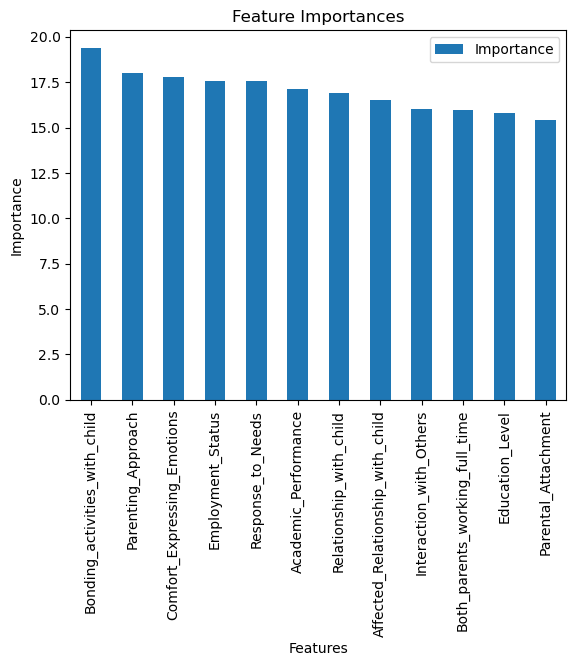

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Behavioral_Problems'])  # Features
y = data['Behavioral_Problems']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Get the coefficients from the input layer
input_layer_coefficients = model.coefs_[0]

# Calculate feature importances
feature_importances = np.abs(input_layer_coefficients).sum(axis=1)

# Create a dataframe with feature importances
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])

# Sort feature importances in descending order
feature_importance_mlp = importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_mlp)

# Plot feature importances
plt.figure(figsize=(8, 6))
feature_importance_mlp.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Kruskalwalis test

In [49]:
data.head()

,Parent_age,Parent_Gender,Child_Age,Child_Gender,Number_of_Children,Family_members,Parental_Attachment,Parenting_Approach,Comfort_Expressing_Emotions,Response_to_Needs,Relationship_with_child,Behavioral_Problems,Interaction_with_Others,Academic_Performance,Education_Level,Both_parents_working_full_time,Employment_Status,Bonding_activities_with_child,Affected_Relationship_with_child
0,40,Male,20,Male,2,4,Secure,Warm and responsive,Yes,Prompt and supportive,Excellent,No,Very well,Above average,Bachelor's degree,No,Employed full-time,Several times a week,No
1,58,Male,24,Male,3,5,Secure,Warm and responsive,Sometimes,Prompt and supportive,Excellent,Sometimes,Very well,Above average,Master's degree or higher,Yes,Employed full-time,Daily,Yes
2,45,Male,21,Male,2,4,Secure,Warm and responsive,Yes,Prompt and supportive,Excellent,Yes,Very well,Above average,High school or equivalent,Yes,Employed full-time,Daily,Yes
3,45,Male,18,Male,3,5,Secure,cool and Descent,Yes,Prompt and supportive,Excellent,Sometimes,Very well,Above average,High school or equivalent,No,Employed part-time,Several times a week,No
4,37,Female,17,Male,2,4,Secure,Warm and responsive,Sometimes,Prompt and supportive,Excellent,No,Very well,Above average,High school or equivalent,No,Homemaker,Daily,No


In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [27]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Shapiro-Wilk Test for Normality
def check_normality(data):
    stat, p = stats.shapiro(data)
    print('Shapiro-Wilk Test:')
    print('Test Statistic = %.3f, p-value = %.3f' % (stat, p))
    if p > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

# Load data from CSV file into a DataFrame


# Check normality of a specific column, assuming 'column_name' is the column of interest
check_normality(data['Relationship_with_child'])

Shapiro-Wilk Test:
Test Statistic = 0.778, p-value = 0.000
Data does not look normally distributed (reject H0)


In [35]:
import scipy.stats as stats
import pandas as pd

# Load data from CSV file into a DataFrame

# Kruskal-Wallis test for 'Attachment'
kw_stat_att, p_value_att = stats.kruskal(*[group['Relationship_with_child'] for name, group in data.groupby('Parental_Attachment')])
print("Kruskal-Wallis Test for Parental_Attachment:")
print("Test Statistic:", kw_stat_att)
print("p-value:", p_value_att)

# Kruskal-Wallis test for 'Approach'
kw_stat_app, p_value_app = stats.kruskal(*[group['Relationship_with_child'] for name, group in data.groupby('Parenting_Approach')])
print("\nKruskal-Wallis Test for Parenting_Approach:")
print("Test Statistic:", kw_stat_app)
print("p-value:", p_value_app)

Kruskal-Wallis Test for Parental_Attachment:
Test Statistic: 11.563880116643439
p-value: 0.009036707349307659

Kruskal-Wallis Test for Parenting_Approach:
Test Statistic: 24.32981586300065
p-value: 2.1316601447874476e-05


# Reliability of Questionaire

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

# Assuming 'df' is your DataFrame containing the questionnaire data

# Features list
features = [
    "Parent_age",
    "Parent_Gender",
    "Child_Age",
    "Child_Gender",
    "Number_of_Children",
    "Family_members",
    "Parental_Attachment",
    "Parenting_Approach",
    "Comfort_Expressing_Emotions",
    "Response_to_Needs",
    "Relationship_with_child",
    "Behavioral_Problems",
    "Interaction_with_Others",
    "Academic_Performance",
    "Education_Level",
    "Both_parents_working_full_time",
    "Employment_Status",
    "Bonding_activities_with_child",
    "Affected_Relationship_with_child"
]

# Initialize a dictionary to store Guttman Split-Half Coefficients for each feature
guttman_coefficients = {}

for feature in features:
    # Split the data into two halves, considering only the current feature
    half1, half2 = train_test_split(df[feature], test_size=0.5, random_state=42)
    
    # Calculate Spearman correlation between the two halves
    correlation, p_value = spearmanr(half1.values.flatten(), half2.values.flatten())
    
    # Guttman Split-Half Coefficient is the Spearman-Brown prophecy formula
    # It's calculated as: 2 * correlation / (1 + correlation)
    guttman_coefficient = 2 * correlation / (1 + correlation)
    
    # Store the Guttman Split-Half Coefficient for the current feature
    guttman_coefficients[feature] = guttman_coefficient

# Identify features with a Guttman Split-Half Coefficient below 0.5
low_reliability_features = [feature for feature, coefficient in guttman_coefficients.items() if coefficient < 0.5]

if low_reliability_features:
    print("The following features have a Guttman Split-Half Coefficient below 0.5:")
    for feature in low_reliability_features:
        print(f"- {feature}")
    
    # Suggest improvements to increase reliability
    print("\nSuggestions to increase reliability:")
    print("1. Review the data collection process for the identified features.")
    print("2. Consider adding more questions or items to measure the same construct.")
    print("3. Ensure that the questions are clear, unambiguous, and relevant to the construct being measured.")
    print("4. Provide clear instructions and examples to participants to minimize misunderstandings.")
    print("5. Conduct pilot testing and cognitive interviews to identify and address any issues with the questionnaire items.")
else:
    print("All features have a Guttman Split-Half Coefficient of 0.5 or above, indicating high reliability.")

The following features have a Guttman Split-Half Coefficient below 0.5:
- Parent_age
- Parent_Gender
- Child_Age
- Child_Gender
- Number_of_Children
- Family_members
- Parental_Attachment
- Parenting_Approach
- Comfort_Expressing_Emotions
- Response_to_Needs
- Relationship_with_child
- Behavioral_Problems
- Interaction_with_Others
- Academic_Performance
- Education_Level
- Both_parents_working_full_time
- Employment_Status
- Bonding_activities_with_child
- Affected_Relationship_with_child

Suggestions to increase reliability:
1. Review the data collection process for the identified features.
2. Consider adding more questions or items to measure the same construct.
3. Ensure that the questions are clear, unambiguous, and relevant to the construct being measured.
4. Provide clear instructions and examples to participants to minimize misunderstandings.
5. Conduct pilot testing and cognitive interviews to identify and address any issues with the questionnaire items.


In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# Convert dataset to DataFrame

# Create contingency table
contingency_table = pd.crosstab(df['Education_Level'], [df['Academic_Performance'], df['Parenting_Approach']])
# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
# Output results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 50.057094450089465
Degrees of freedom: 22
p-value: 0.000576131068813967
Expected frequencies table:
[[ 2.08974359  6.26923077 40.12307692 25.07692308  2.50769231 13.79230769
  23.40512821 34.27179487  2.92564103  3.34358974  2.50769231  6.68717949]
 [ 1.58974359  4.76923077 30.52307692 19.07692308  1.90769231 10.49230769
  17.80512821 26.07179487  2.22564103  2.54358974  1.90769231  5.08717949]
 [ 1.32051282  3.96153846 25.35384615 15.84615385  1.58461538  8.71538462
  14.78974359 21.65641026  1.84871795  2.11282051  1.58461538  4.22564103]]


In [27]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset into a DataFrame
# Assuming the dataset is named 'data'
# Replace 'data' with the actual name of your DataFrame

# Define the independent variables (features)
X = data[['Bonding_activities_with_child', 'Education_Level']]

# Add a constant term to the independent variables matrix for the intercept
X = sm.add_constant(X)

# Define the dependent variable
y = data['Academic_Performance']  # Assuming Academic_Performance has multiple categories

# Fit multinomial logistic regression model
multinom_model = sm.MNLogit(y, X)
result = multinom_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.934930
         Iterations 6
                           MNLogit Regression Results                           
Dep. Variable:     Academic_Performance   No. Observations:                  390
Model:                          MNLogit   Df Residuals:                      384
Method:                             MLE   Df Model:                            4
Date:                  Wed, 15 May 2024   Pseudo R-squ.:                0.006504
Time:                          23:50:48   Log-Likelihood:                -364.62
converged:                         True   LL-Null:                       -367.01
Covariance Type:              nonrobust   LLR p-value:                    0.3113
       Academic_Performance=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1972      0.193   